<a href="https://colab.research.google.com/github/anisafitriani1122/Tugas-Akhir/blob/main/Code_TA_Anisa_Fitriani_Data_Muka_Air_Lautipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
.from tensorflow.keras.optimizers import Adam

In [ ]:
# Import Dataset
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ0TPR_Xrr_fby5jFa7L69qZUg-Pf-w5oFjkYVVhwjRLUw9AhA50pyUL60sjAj6AH9jGuqre78IV3MZ/pub?output=xlsx'

# Membaca file Excel dari URL dan memuatnya sebagai DataFrame Pandas
data = pd.read_excel(link)
# Mengambil kolom 'Sea Level' dari DataFrame
sea_level_data = data['Sea Level']

# Menampilkan 5 baris pertama dari kolom 'Sea Level'
print("5 Baris Pertama dari Kolom 'Sea Level':")
print(sea_level_data.head())

# Menampilkan statistik deskriptif dari kolom 'Sea Level'
print("\nStatistik Deskriptif 'Sea Level':")
print(sea_level_data.describe())

# Mengambil kolom 'Sea Level' dari DataFrame dan mengubahnya menjadi array NumPy
dataset = data['Sea Level'].values

# Mengonversi array NumPy ke tipe data float32
dataset = dataset.astype('float32')

5 Baris Pertama dari Kolom 'Sea Level':
0   -92.37
1   -93.05
2   -95.67
3   -93.19
4   -88.16
Name: Sea Level, dtype: float64

Statistik Deskriptif 'Sea Level':
count    799.000000
mean     -52.933605
std       32.608162
min     -130.000000
25%      -79.280000
50%      -50.800000
75%      -26.965000
max       19.020000
Name: Sea Level, dtype: float64


In [ ]:
# Normalisasi Data
scaler = MinMaxScaler(feature_range=(0, 1))  # Menentukan rentang nilai output normalisasi (0 hingga 1)
dataset = np.reshape(dataset, (-1, 1))  # Mengubah array dataset menjadi array 2 dimensi dengan satu kolom
dataset = scaler.fit_transform(dataset)  # Normalisasi data agar nilainya berada dalam rentang 0 hingga 1

# Menampilkan dataset yang telah dinormalisasi
print(dataset)

[[0.2525164 ]
 [0.24795324]
 [0.23037177]
 [0.2470138 ]
 [0.28076762]
 [0.29116893]
 [0.28533077]
 [0.29210842]
 [0.3365991 ]
 [0.4194739 ]
 [0.5055026 ]
 [0.59347737]
 [0.6603811 ]
 [0.6962152 ]
 [0.7197691 ]
 [0.7156086 ]
 [0.73238486]
 [0.7696953 ]
 [0.7850624 ]
 [0.7751308 ]
 [0.78056633]
 [0.78674   ]
 [0.81130046]
 [0.8149241 ]
 [0.83008987]
 [0.818682  ]
 [0.79022944]
 [0.7635887 ]
 [0.73339146]
 [0.71332705]
 [0.68916917]
 [0.6564219 ]
 [0.62877464]
 [0.6089115 ]
 [0.6095154 ]
 [0.5931418 ]
 [0.5521406 ]
 [0.54227614]
 [0.5312709 ]
 [0.5101999 ]
 [0.4875855 ]
 [0.47866055]
 [0.47577503]
 [0.45732114]
 [0.44490668]
 [0.4353107 ]
 [0.43115014]
 [0.41403833]
 [0.3752516 ]
 [0.37323847]
 [0.37746608]
 [0.37659374]
 [0.39498052]
 [0.40343577]
 [0.42054752]
 [0.43739092]
 [0.45772377]
 [0.47785527]
 [0.49369207]
 [0.5187223 ]
 [0.5525433 ]
 [0.54858404]
 [0.5362367 ]
 [0.53831697]
 [0.590055  ]
 [0.6038115 ]
 [0.5922694 ]
 [0.5783787 ]
 [0.5750905 ]
 [0.5772379 ]
 [0.5752919 ]
 [0.52

In [ ]:
# Bagi Data Menjadi Training dan Testing
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

639 160


In [ ]:
# Fungsi untuk Membuat Dataset untuk LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 6  # Jumlah langkah waktu yang digunakan untuk prediksi
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# Reshape input untuk LSTM (samples, timesteps, features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# Hyperparameter yang akan dituning selain look_back
epochs = 100          #[50, 100]
batch_size = 32       #[16, 32]
learning_rate = 0.01   #[0.001, 0.01]
units = 128           #[64, 128]

# Model LSTM
model = Sequential()
model.add(LSTM(units=units, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(units=units))
model.add(Dense(1))


In [ ]:
# Compile Model dengan Adam Optimizer dan Learning Rate yang bisa diubah
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=optimizer)

#Train Model dengan Epoch dan Batch Size yang bisa diubah
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

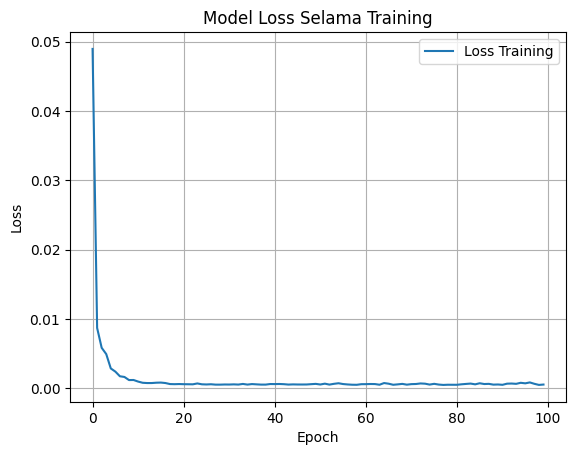

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Loss Training')  # Mengambil nilai loss dari history dan menambahkan label
plt.title('Model Loss Selama Training')  # Judul grafik
plt.xlabel('Epoch')  # Label sumbu X
plt.ylabel('Loss')  # Label sumbu Y
plt.grid()  # Menambahkan grid untuk memperjelas grafik
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan grafik

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


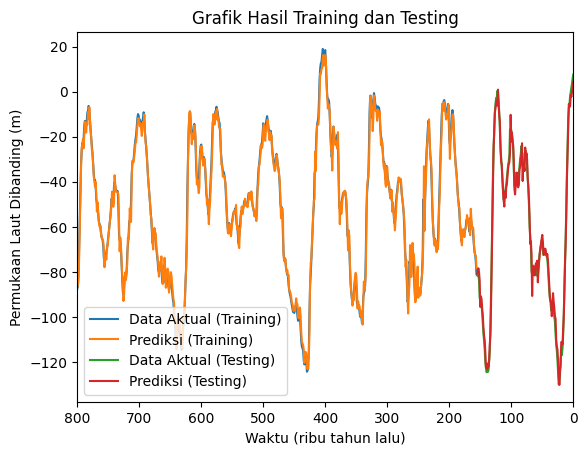

In [ ]:
# Prediksi
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse Transform untuk mendapatkan nilai asli
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Flatten the arrays to 1-D
trainPredict = trainPredict.flatten()  # Mengubah array hasil prediksi pada data training menjadi array 1-D
testPredict = testPredict.flatten()    # Mengubah array hasil prediksi pada data testing menjadi array 1-D
trainY = trainY.flatten()              # Mengubah array label asli (ground truth) dari data training menjadi array 1-D
testY = testY.flatten()                # Mengubah array label asli (ground truth) dari data testing menjadi array 1-D

# Membuat array waktu dari 800 ke 0
total_length = len(trainY) + len(testY)  # Total panjang data
waktu = np.linspace(800, 0, num=total_length)  # Waktu dari 800 ke 0

# Plot prediksi vs nilai aktual
plt.plot(waktu[:len(trainY)], trainY, label='Data Aktual (Training)')  # Data aktual training
plt.plot(waktu[:len(trainY)], trainPredict, label='Prediksi (Training)')  # Prediksi training
plt.plot(waktu[len(trainY):], testY, label='Data Aktual (Testing)')  # Data aktual testing
plt.plot(waktu[len(trainY):], testPredict, label='Prediksi (Testing)')  # Prediksi testing

# Menambahkan judul dan label
plt.title('Grafik Hasil Training dan Testing')  # Judul grafik
plt.xlabel('Waktu (ribu tahun lalu)')  # Label sumbu X
plt.ylabel('Permukaan Laut Dibanding (m)')  # Label sumbu Y

plt.legend()  # Menampilkan legenda
plt.xlim(800, 0)  # Mengatur batas sumbu X dari 800 ke 0
plt.show()  # Menampilkan plot

In [ ]:
# Menghitung RMSE untuk data training
train_rmse = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE:', train_rmse)

# Calculate RMSE for testing data
test_rmse = math.sqrt(mean_squared_error(testY, testPredict))
print('Test RMSE:', test_rmse)

Train RMSE: 3.369201922229253
Test RMSE: 3.3659210299629954


In [ ]:
# Menghitung R-squared untuk data training
train_r2 = r2_score(trainY, trainPredict)
print('Train R-squared:', train_r2)

# Menghitung R-squared untuk data testing
test_r2 = r2_score(testY, testPredict)
print('Test R-squared:', test_r2)

Train R-squared: 0.9879272186231931
Test R-squared: 0.9920191314845752


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
   Waktu (ribu tahun lalu)  Permukaan Laut (m)
0                       -1            6.162129
1                       -2            0.026558
2                       -3           -6.966758
3                       -4          -13.093945
4                       -5          -18.556274
5                       -6          -24.103802
6                       -7          -29.823248
7                       -8          -35.277824
8                       -9          -40.195801
9                      -10          -44.656342


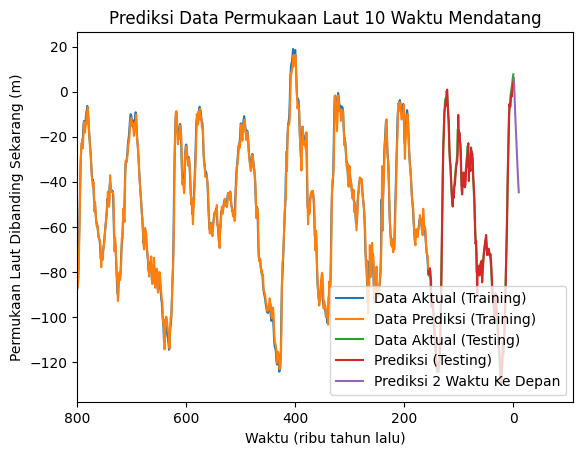

Forecast untuk 10 waktu ke depan: [ 6.1621294e+00  2.6558030e-02 -6.9667578e+00 -1.3093945e+01
 -1.8556274e+01 -2.4103802e+01 -2.9823248e+01 -3.5277824e+01
 -4.0195801e+01 -4.4656342e+01]


In [ ]:
look_back = 6  # Jumlah langkah waktu yang digunakan untuk prediksi
last_data = dataset[-look_back:]  # Ambil data terakhir sebanyak look_back
forecast_data = []

# Forecast untuk 10 waktu ke depan
for _ in range(10):  # Forecast untuk 10 langkah waktu
    input_data = np.reshape(last_data, (1, look_back, 1))
    prediction = model.predict(input_data)
    forecast_data.append(prediction[0][0])
    last_data = np.append(last_data[1:], prediction)  # Update data terakhir dengan prediksi
    last_data = last_data[-look_back:]

# Inverse transform untuk mendapatkan nilai asli
forecast_data = scaler.inverse_transform(np.array(forecast_data).reshape(-1, 1))
forecast_data = forecast_data.flatten()

# Membuat array waktu untuk 10 waktu ke depan dari -1 hingga -25
waktu_prediksi = np.arange(-1, -11, -1)  # Waktu dari -1 ke -10

# Membuat array waktu untuk data aktual dari 800 hingga 0
total_length = len(trainY) + len(testY)  # Total panjang data
waktu_aktual = np.linspace(800, 0, num=total_length)  # Waktu dari 800 ke 0

# Membuat DataFrame untuk hasil prediksi
data_prediksi = pd.DataFrame({
    'Waktu (ribu tahun lalu)': waktu_prediksi,
    'Permukaan Laut (m)': forecast_data
})

# Menampilkan tabel hasil prediksi
print(data_prediksi)

# Plot forecast
plt.plot(waktu_aktual[:len(trainY)], trainY, label='Data Aktual (Training)')  # Data aktual training
plt.plot(waktu_aktual[:len(trainY)], trainPredict, label='Data Prediksi (Training)')  # Prediksi training
plt.plot(waktu_aktual[len(trainY):], testY, label='Data Aktual (Testing)')  # Data aktual testing
plt.plot(waktu_aktual[len(trainY):], testPredict, label='Prediksi (Testing)')  # Prediksi testing
plt.plot(waktu_prediksi, forecast_data, label='Prediksi 2 Waktu Ke Depan', linestyle='-')  # Prediksi 10 waktu ke depan

# Menambahkan judul dan label
plt.title('Prediksi Data Permukaan Laut 10 Waktu Mendatang')
plt.xlabel('Waktu (ribu tahun lalu)')
plt.ylabel('Permukaan Laut Dibanding Sekarang (m)')

plt.legend()  # Menampilkan legenda
plt.xlim(800, -110)  # Mengatur batas sumbu X dari 800 ke -20
plt.show()  # Menampilkan plot

print("Forecast untuk 10 waktu ke depan:", forecast_data)

In [ ]:
# Hasil Prediksi 1 Waktu Ke depan
#waktu_prediksi = np.arange(0, 2, 1)
#forecast_data = [8.96, 7.3972]  # Example forecast values


#plt.plot(waktu_prediksi, forecast_data, label='Prediksi 1 Waktu Ke Depan', marker='o')

# Menambahkan judul dan label
# plt.title('Prediksi Data Permukaan Laut 1 Waktu Mendatang'
# plt.xlabel('Waktu (ribu tahun lalu)')
# plt.ylabel('Permukaan Laut Dibanding Sekarang (m)')

# Mengatur rentang sumbu Y dengan interval 0.05
# y_ticks = np.arange(min(forecast_data) - 0.05, max(forecast_data) + 0.05, 0.05)
# plt.yticks(y_ticks)
# Mengatur rentang sumbu X dengan interval 0.1
# x_ticks = np.arange(0, 1.1, 0.1)  # Rentang dari 0 hingga 1 dengan interval 0.1
# plt.xticks(x_ticks)

# plt.legend()  # Menampilkan legenda
# plt.grid(True) #adds gridlines

In [ ]:
#from itertools import product

# Parameter untuk Grid Search
# look_back_list = [3, 6, 12]  # Variasi look_back yang ingin diuji
# epochs_list = [50, 100]
# batch_size_list = [16, 32]
# earning_rate_list = [0.001, 0.01]
# units_list = [64, 128]

# Menyimpan hasil tuning
#results = []

# Iterasi semua kombinasi hyperparameter
# for look_back, epochs, batch_size, learning_rate, units in product(look_back_list, epochs_list, batch_size_list, learning_rate_list, units_list):
    # print(f"Training with: look_back={look_back}, epochs={epochs}, batch_size={batch_size}, learning_rate={learning_rate}, units={units}")

    # Membentuk dataset berdasarkan look_back
    # trainX, trainY = create_dataset(train, look_back)
    # testX, testY = create_dataset(test, look_back)

    # Reshape input untuk LSTM (samples, timesteps, features)
    # trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
    # testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

    # Buat model
    # model = Sequential()
    # model.add(LSTM(units=units, return_sequences=True, input_shape=(look_back, 1)))
    # model.add(LSTM(units=units))
    # model.add(Dense(1))

    # Compile model
    # optimizer = Adam(learning_rate=learning_rate)
    # model.compile(loss='mean_squared_error', optimizer=optimizer)

    # Train model
    # history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=0)

    # Prediksi
    # testPredict = model.predict(testX)
    # testPredict = scaler.inverse_transform(testPredict)
    # testY_actual = scaler.inverse_transform([testY])

    # Menghitung RMSE
    # test_rmse = math.sqrt(mean_squared_error(testY_actual.flatten(), testPredict.flatten()))
    # print(f"Test RMSE: {test_rmse}")

    # Simpan hasil
    # results.append({
        # 'look_back': look_back,
        # 'epochs': epochs,
        # 'batch_size': batch_size,
        # 'learning_rate': learning_rate,
        # 'units': units,
        #'test_rmse': test_rmse
   # })

# Cari kombinasi terbaik
# best_result = min(results, key=lambda x: x['test_rmse'])
# print("Best Hyperparameters:")
# print(best_result)


Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Test RMSE: 5.286021794907795
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test RMSE: 4.362283128900526
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.01, units=64


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step
Test RMSE: 3.8290934376442602
Training with: look_back=3, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test RMSE: 4.061141043179831
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Test RMSE: 9.950309865375
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Test RMSE: 6.058119782211794
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Test RMSE: 4.596163169330236
Training with: look_back=3, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Test RMSE: 4.025146742679604
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Test RMSE: 3.777221855739974
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
Test RMSE: 3.584790570772973
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Test RMSE: 4.447657051395006
Training with: look_back=3, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Test RMSE: 3.893090039741957
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Test RMSE: 4.373505627630795
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Test RMSE: 4.002454502761272
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Test RMSE: 3.771934408571112
Training with: look_back=3, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Test RMSE: 3.58639417274734
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test RMSE: 4.705198240313745
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Test RMSE: 3.807063954742017
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Test RMSE: 4.660112777737476
Training with: look_back=6, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
Test RMSE: 3.402958841573785
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Test RMSE: 7.553238349661352
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Test RMSE: 6.13279277454881
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
Test RMSE: 4.630048179033113
Training with: look_back=6, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
Test RMSE: 3.7573894234025746
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
Test RMSE: 3.437616948650022
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Test RMSE: 3.5390750649489258
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Test RMSE: 3.4608554429830694
Training with: look_back=6, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test RMSE: 3.5835573958744757
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test RMSE: 4.085235955642659
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Test RMSE: 4.324747385308261
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Test RMSE: 3.5668982080560436
Training with: look_back=6, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Test RMSE: 4.201619350422501
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step
Test RMSE: 3.9349256385803213
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
Test RMSE: 3.877073210479814
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
Test RMSE: 3.5185208856574652
Training with: look_back=12, epochs=50, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Test RMSE: 3.2870231111955124
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
Test RMSE: 5.671129391680726
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Test RMSE: 4.592831792206958
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Test RMSE: 3.939090226497722
Training with: look_back=12, epochs=50, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step
Test RMSE: 3.480765847008603
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
Test RMSE: 3.7418463491496086
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step
Test RMSE: 3.4475703495974
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
Test RMSE: 5.4219396308790415
Training with: look_back=12, epochs=100, batch_size=16, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Test RMSE: 5.591108214055874
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.001, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
Test RMSE: 3.4586000413019917
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.001, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Test RMSE: 3.741232844420838
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.01, units=64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step
Test RMSE: 3.6718870064153233
Training with: look_back=12, epochs=100, batch_size=32, learning_rate=0.01, units=128


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step
Test RMSE: 3.2373987091262406
Best Hyperparameters:
{'look_back': 12, 'epochs': 100, 'batch_size': 32, 'learning_rate': 0.01, 'units': 128, 'test_rmse': 3.2373987091262406}
